In [32]:
import math
import torch
#import gpytorch
import pyro
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
intensity_max = 50
true_intensity_function = lambda times: torch.cos(times * 2 * math.pi).add(1).mul(intensity_max / 2.)

In [34]:
max_time = 2

times = torch.linspace(0, max_time, 128)
num_samples = int(pyro.distributions.Poisson(true_intensity_function(times).mean() * max_time).sample().item())
print(f"Number of sampled arrivals: {num_samples}")

Number of sampled arrivals: 50


In [35]:
def log_prob_accept(val):
    intensities = true_intensity_function(val)
    res = torch.log(intensities / (true_intensity_function(times).mean() * max_time))
    return res

arrival_times = pyro.distributions.Rejector(
    propose=pyro.distributions.Uniform(times.min(), times.max()),
    log_prob_accept=log_prob_accept,
    log_scale=0.
)(torch.Size([num_samples]))

In [36]:
def f(b,t):
    T = t.max()
    n = len(t)
    p2 = math.pi/2
    arg = b*t+p2
    C1 = (b*torch.cos(arg)/torch.sin(arg)).sum()
    C2 = (n/b)*((1-b*torch.sin(b*T+p2)-torch.cos(b*T+p2))/(1+b*T-torch.cos(b*T+p2)))
    return C1+C2

In [37]:
B = torch.linspace(0,,1000)
fs = [f(b,arrival_times) for b in B]

SyntaxError: invalid syntax (<ipython-input-37-ee0c5aaf4e23>, line 1)

(-10, 10)

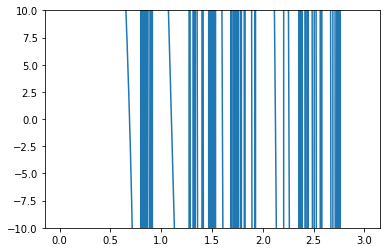

In [38]:
plt.plot(B,fs)
plt.ylim(-10,10)